<h1 style="color: darkblue" align='center'> Heart Disease Classification Using KNN <h1>
    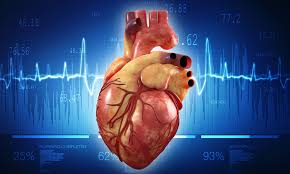

<h3> Importing required packages, modules and classes
    <h3>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<p><b> Reading the dataset </b><p>

In [3]:
df = pd.read_csv("Heart Disease Dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<p><b>Features of the dataset</b></p>
<ul>
    <li><b> age</b>: age in years </li>
    <li><b> sex</b>: Male = 1, Female = 0 </li>
    <li><b> cp</b>: chest pain type<ul><li>0: typical angina</li><li>1: atypical angina</li><li>2: non-anginal pain</li><li>3: asymptomatic</li></ul> </li>
    <li><b> trestbps</b>: resting blood pressure (in mm Hg) </li>
    <li><b> chol</b>: serum cholestrol in mg/dl </li>
    <li><b> fbs</b>: fasting blood sugar > 120 mg/dl (1 = True, 0 = False) </li>
    <li><b> restecg</b>: resting electrocardiographic results<ul><li>0: normal</li><li>1: having ST-T wave abnormality</li><li>2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li></ul> </li>
    <li><b> thalach</b>: maximum heart rate achieved </li>
    <li><b> exang</b>: exercise induced angina (1 = Yes, 0 = No) </li>
    <li><b> oldpeak</b>: ST depression induced by exercise relative to rest</li>
    <li><b> slope</b>: the slope of the peak exercise ST segment
        <ul>
            <li>0: upsloping </li>
            <li>1: flat</li>
            <li>2: downsloping</li>
        </ul>
    </li>
    <li><b> ca</b>: Number of major vessels (0-3) colored by flouroscopy</li>
    <li><b> thal</b>: 1 = noraml, 2 = fixed defect, 3 = reversible defect</li>
    <li><b>target</b>: 1 = True, 2 = False</li>
</ul>
<p><b>Let's take a quick look at our dataset</b></p>

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


<p> The dataset contains 303 entries. There are no missing entries i.e. no NaN value anywhere in the dataset </p>

<p>The following plot of the target feature gives the total number of patients not having(0) and having(1) the heart disease </p>

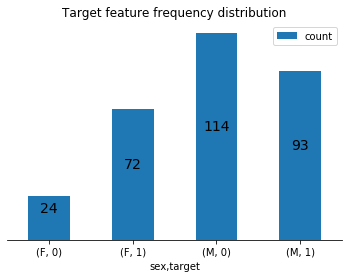

In [66]:
temp = pd.DataFrame(df.groupby(['sex', 'target'])['target'].count())
temp.rename(columns={'target': 'count'}, inplace=True)
temp.reset_index(inplace=True)
temp['sex'] = temp['sex'].map({0: 'F', 1: 'M'})
temp.set_index(['sex', 'target'], inplace=True)
ax = temp.plot(kind='bar')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=2),
           (p.get_x()+p.get_width()/2, p.get_height()-p.get_height()/2),
           ha='center', va='center', xytext=(0,10), textcoords='offset points', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.xticks(rotation=0)
ax.set_ylabel("")
ax.set_title("Target feature frequency distribution")
plt.show()

<p>24 female patients and 114 male patients do not have a heart disease<br>72 female patients and 93 male patients have a heart disease</p>

<p>Let's look at the distribution of patients w.r.t. age. </p>

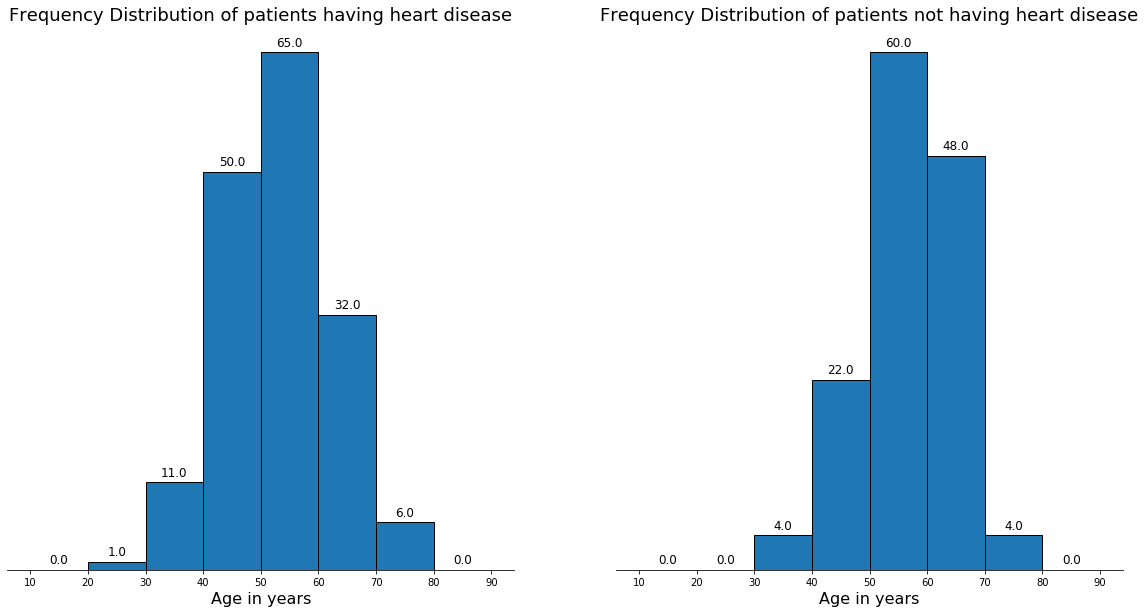

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))

ax1.hist(df[df['target'] == 1]['age'], bins = np.linspace(10,90,9) , edgecolor='black')

for p in ax1.patches:
    ax1.annotate(np.round(p.get_height(), decimals=2),
               (p.get_x()+p.get_width()/2, p.get_height()),
               ha='center', va='center', xytext=(0,10), textcoords='offset points', fontsize=12)
ax1.set_xlabel("Age in years", fontsize=16)
ax1.set_title("Frequency Distribution of patients having heart disease", fontsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_yticks([])
ax1.set_ylabel("")

ax2.hist(df[df['target'] == 0]['age'], bins = np.linspace(10,90,9) , edgecolor='black')
for p in ax2.patches:
    ax2.annotate(np.round(p.get_height(), decimals=2),
               (p.get_x()+p.get_width()/2, p.get_height()),
               ha='center', va='center', xytext=(0,10), textcoords='offset points', fontsize=12)
ax2.set_xlabel("Age in years", fontsize=16)
ax2.set_title("Frequency Distribution of patients not having heart disease", fontsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_yticks([])
ax2.set_ylabel("")

plt.show()


<p>Maximum number of patients having heart disease belong to 50-60 years old group.</p>

<p>From above two frequency distribution, it can be concluded that age and sex of the patients is a factor in determining whether the patient have a heart disease or not.</p>

The required features for prediction are:

<i>'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'</i>


Age, trestbps, chol, thalach and oldpeak requires normalization to bring them to a same range.<br>
The other remaining features will not require normalization as they are categorical.

Here, I am using StandardScaler Normalization Technique to scale down the data.<br>
The StandardScaler Normalization is available in scikit learn preprocessing module.

In [71]:
from sklearn.preprocessing import StandardScaler

In [73]:
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scale = StandardScaler()
df[columns_to_normalize] = scale.fit_transform(df[columns_to_normalize])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


<p> The data is now normalized <br>

<h4>Training and Testing Data</h4>

To create a model, the first step is to split the data into training and testing data.<br>
Training data is used to develop a model, testing data is used to evaluate the model.<br>
The train_test_split function imported from scikit learn's model_selection module is used to generate training and testing data.

In [74]:
from sklearn.model_selection import train_test_split

<p><b>Independent Variables X:</b>  <i>'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'</i>
<p><b>Dependent Variable y:</b> <i>'target'</i>

In [75]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].to_numpy()
y = df['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [76]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (227, 13)
y_train shape:  (227,)
X_test shape:  (76, 13)
y_test shape:  (76,)


<h3>KNN Classification Technique </h3>

<p>KNN Classification model can be developed using KNeighborsClassifier from sklearn.neighbors module.

In [77]:
from sklearn.neighbors import KNeighborsClassifier

The KNeighborsClassifier requires number of neighbors as argument.<br>
To obtain the best value of 'k' (number of neighbors), we will plot a graph of 'model accuracy' vs 'k'.<br>
The value of 'k' for which the accuracy is maximum is selected as the value for number of neighbors.<br>
Let range of 'k' be 1-30.<br>

In [92]:
n = list(range(1, 31))
accuracy = []
for k in n:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    score = np.mean(y_test == y_hat)
    accuracy.append(score)

<IPython.core.display.Javascript object>


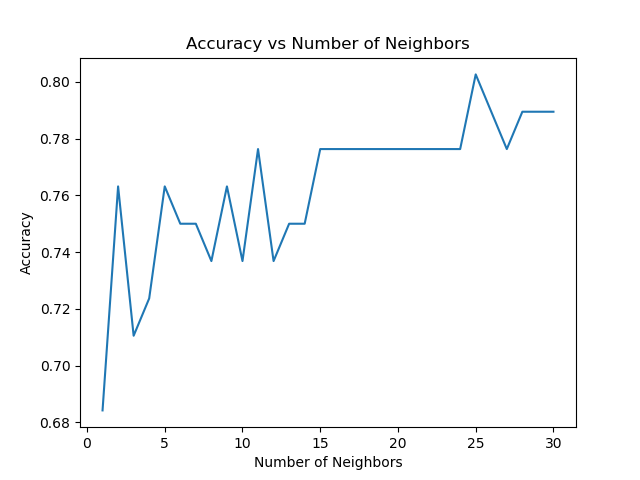

Maximum Accuracy :  0.8026315789473685
Number of Neighbors:  25


In [93]:
plt.plot(n, accuracy)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors")
plt.show()
print("Maximum Accuracy : ", max(accuracy))
print("Number of Neighbors: ", accuracy.index(max(accuracy)) + 1)

<h5>Model Development</h5>

In [94]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

<h5>Model Evaluation</h5>

In [98]:
y_hat = knn.predict(X_test)
y_hat

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76        35
           1       0.77      0.90      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.80        76
weighted avg       0.81      0.80      0.80        76



In [123]:
def plot_confusion_matrix(matrix, classes, title, cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(len(classes)), classes)
    plt.yticks(np.arange(len(classes)), classes)
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], 'd'),
                horizontalalignment='center', color='black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

<IPython.core.display.Javascript object>


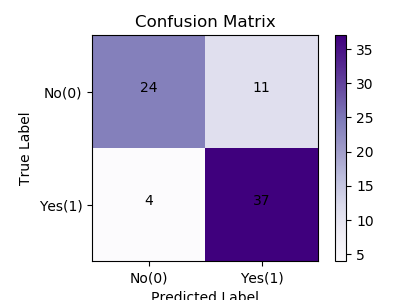

In [124]:
cm = confusion_matrix(y_test, y_hat, labels=[0, 1])
plt.figure(figsize=(4, 3))
plot_confusion_matrix(cm, classes=['No(0)', 'Yes(1)'], title='Confusion Matrix')

<IPython.core.display.Javascript object>


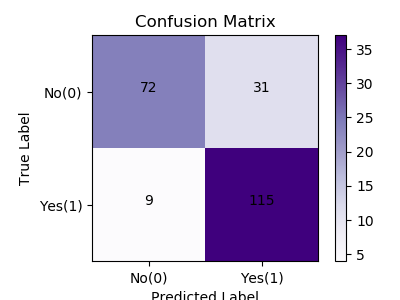

In [125]:
cm2 = confusion_matrix(y_train, knn.predict(X_train), labels=[0, 1])
plt.figure(figsize=(4,3))
plot_confusion_matrix(cm2, classes=['No(0)', 'Yes(1)'], title='Confusion Matrix')

<h1>Notebook by:- Kaushik Metha</h1>